<a href="https://colab.research.google.com/github/niteshiiitl/car_pridiction_Model/blob/main/car_pridiction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [ ]:
car_data = pd.read_csv('/content/car_data.csv')

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.shape

(301, 9)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
car_data.duplicated().sum()

np.int64(2)

In [ ]:
car_data.dropna().reset_index(drop=True)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
car_data.drop_duplicates().reset_index(drop=True)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
print('/nFuel Type:')
print(car_data['Fuel_Type'].value_counts())

print('/nSeller Type:')
print(car_data['Seller_Type'].value_counts())

print('/nTransmission:')
print(car_data['Transmission'].value_counts())

print('/nOwner:')
print(car_data['Owner'].value_counts())

/nFuel Type:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
/nSeller Type:
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
/nTransmission:
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
/nOwner:
Owner
0    290
1     10
3      1
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

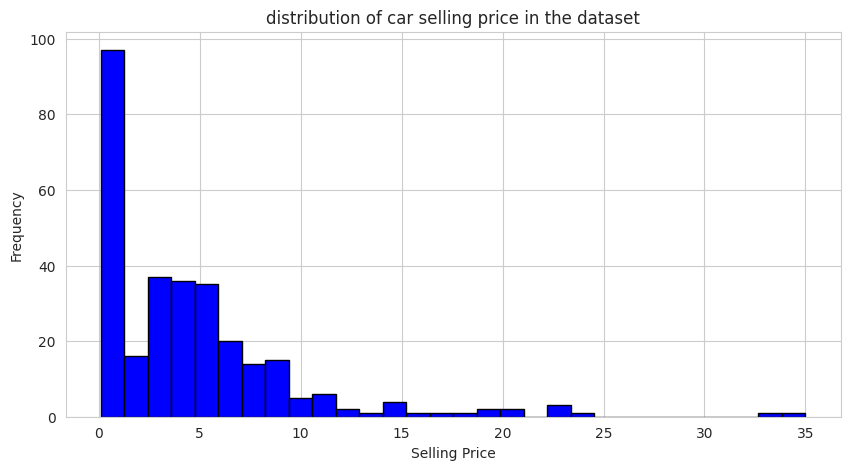

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(car_data['Selling_Price'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('distribution of car selling price in the dataset')
plt.show

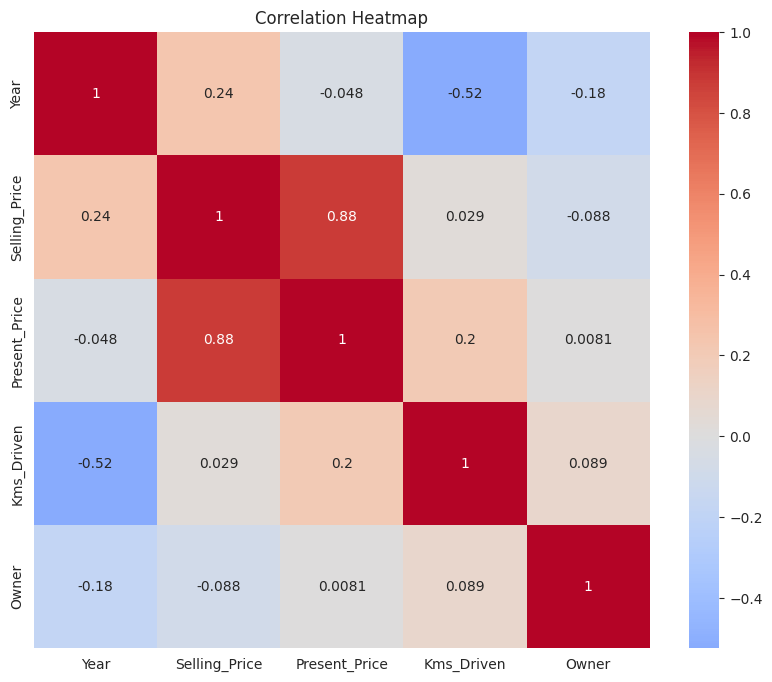

In [ ]:
plt.figure(figsize=(10, 8))
numric_data = car_data.select_dtypes(include=[np.number])
correlation = numric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Fuel Type vs Selling Price')

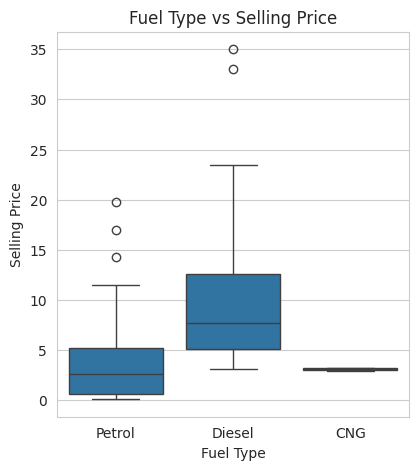

In [ ]:
#fuel type vs selling price

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Fuel Type vs Selling Price')

Text(0.5, 1.0, 'Transmission vs Selling Price')

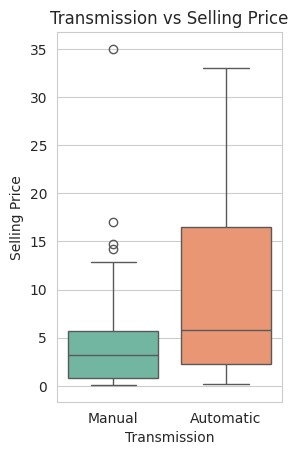

In [ ]:
#transformation vs selling price

plt.subplot(1, 2, 2)
sns.boxplot(x='Transmission', y='Selling_Price', data=car_data, palette='Set2')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.title('Transmission vs Selling Price')

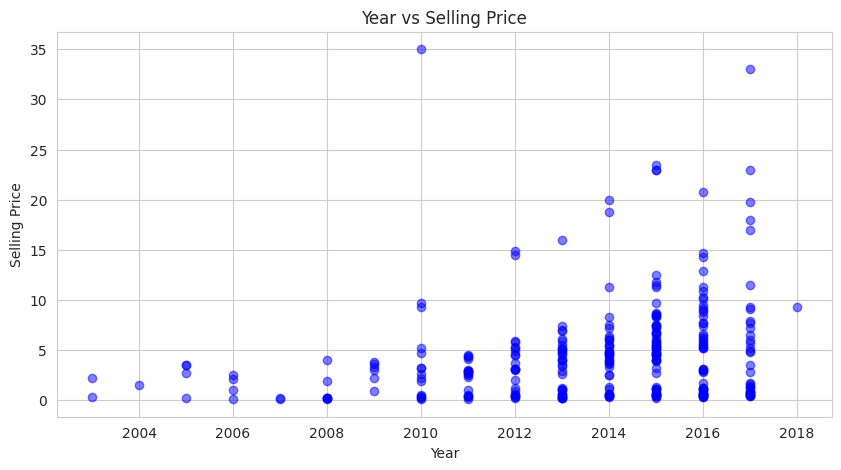

In [ ]:
#year Vs selling price

plt.figure(figsize=(10, 5))
plt.scatter(car_data['Year'], car_data['Selling_Price'], alpha = 0.5, color='blue')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs Selling Price')
plt.show()

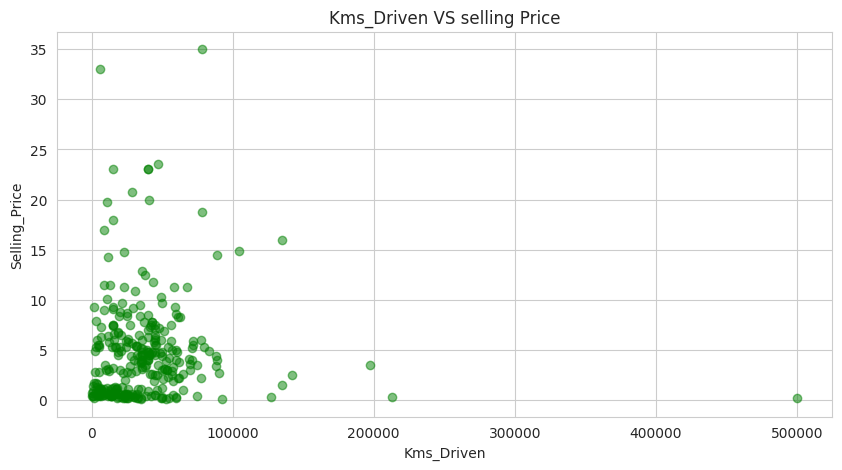

In [ ]:
# kms driven VS selling price

plt.figure(figsize=(10, 5))
plt.scatter(car_data['Kms_Driven'], car_data['Selling_Price'], alpha = 0.5, color='green')
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.title('Kms_Driven VS selling Price')
plt.show()

In [ ]:
#encoding

car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

#print encoded data_set

car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
x= car_data.drop(['Car_Name','Selling_Price'],axis=1)
y= car_data['Selling_Price']

In [ ]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


training data split 80 : 20

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.2, random_state=2)
print (f'training sample : {x_train.shape[0]} (80%)')
print (f'testing sample : {x_test.shape[0]} (20%)')

training sample : 240 (80%)
testing sample : 61 (20%)


In [ ]:
#model 1 Linear Regration

lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

train_pred_lr = lin_reg_model.predict(x_train)
test_pred_lr = lin_reg_model.predict(x_test)
train_r2_lr = metrics.r2_score(y_train, train_pred_lr)

test_r2_lr = metrics.r2_score(y_test, test_pred_lr)
train_mae_lr = metrics.mean_absolute_error(y_train, train_pred_lr)
test_mae_lr = metrics.mean_absolute_error(y_test, test_pred_lr)
train_mse_lr = metrics.mean_squared_error(y_train, train_pred_lr)
test_mse_lr = metrics.mean_squared_error(y_test, test_pred_lr)
train_rmse_lr = np.sqrt(train_mse_lr)
test_rmse_lr = np.sqrt(test_mse_lr)

print('r2 score train ', train_r2_lr)
print('r2 score ', test_r2_lr)
print('mean absolute error ', train_mae_lr)
print('mean absolute error test ', test_mae_lr)
print('mean squared error ', train_mse_lr)
print('mean absolute error test ', test_mae_lr)
print('root mean squared error ', train_rmse_lr)
print('mean absolute error test', test_mae_lr)

r2 score train  0.8838169193709796
r2 score  0.8401532365377697
mean absolute error  1.1998520242148687
mean absolute error test  1.2671998472919161
mean squared error  3.2073273511541056
mean absolute error test  1.2671998472919161
root mean squared error  1.7909012678408895
mean absolute error test 1.2671998472919161


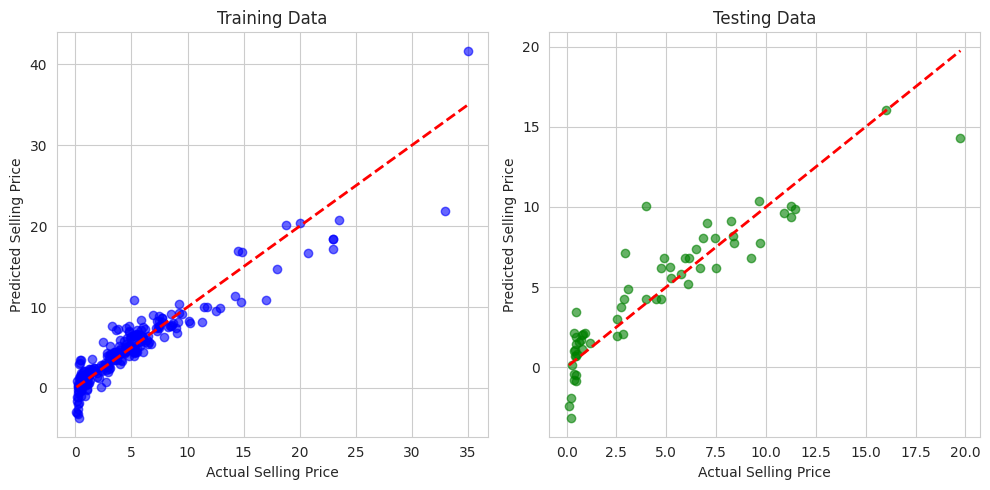

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].scatter(y_train, train_pred_lr, color='blue', label='Training Data', alpha=0.6)
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw =2)
ax[0].set_xlabel('Actual Selling Price')
ax[0].set_ylabel('Predicted Selling Price')
ax[0].set_title('Training Data')

ax[1].scatter(y_test, test_pred_lr, color='green', label='Testing Data', alpha=0.6)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw =2)
ax[1].set_xlabel('Actual Selling Price')
ax[1].set_ylabel('Predicted Selling Price')
ax[1].set_title('Testing Data')

plt.tight_layout()
plt.show()

In [ ]:
#model 2 lasso regression

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)

train_pred_lasso = lasso_reg.predict(x_train)
train_r2_score_lasso = metrics.r2_score(y_train, train_pred_lasso)
train_mae_lasso = metrics.mean_absolute_error(y_train, train_pred_lasso)
train_mse_lasso = metrics.mean_squared_error(y_train, train_pred_lasso)
train_rmse_lasso = np.sqrt(train_mse_lasso)

test_pred_lasso = lasso_reg.predict(x_test)
test_r2_score_lasso = metrics.r2_score(y_test, test_pred_lasso)
test_mae_lasso = metrics.mean_absolute_error(y_test, test_pred_lasso)
test_mse_lasso = metrics.mean_squared_error(y_test, test_pred_lasso)
test_rmse_lasso = np.sqrt(test_mse_lasso)

print('r2 score train ', train_r2_score_lasso)
print('r2 score ', test_r2_score_lasso)
print('mean absolute error ', train_mae_lasso)
print('mean absolute error test ', test_mae_lasso)
print('mean squared error ', train_mse_lasso)
print('mean squared error test ', test_mse_lasso)
print('root mean squared error ', train_rmse_lasso)
print('root mean squared error test', test_rmse_lasso)


r2 score train  0.8736452471129416
r2 score  0.8578767759929424
mean absolute error  1.1920859027644928
mean absolute error test  1.2038465262647073
mean squared error  3.488124541791106
mean squared error test  2.6103042801611185
root mean squared error  1.8676521468922167
root mean squared error test 1.6156436117414998


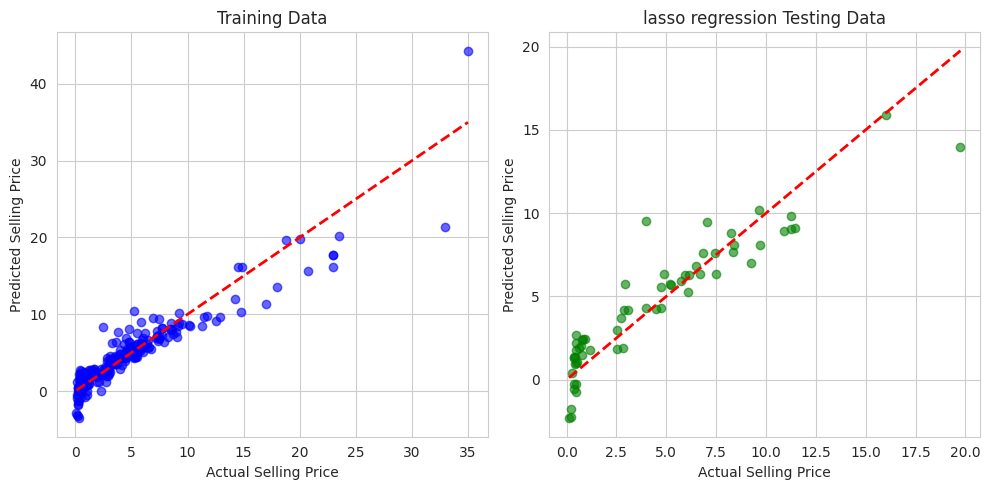

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

ax[0].scatter(y_train, train_pred_lasso, color='blue', label='Training Data', alpha=0.6)
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw =2)
ax[0].set_xlabel('Actual Selling Price')
ax[0].set_ylabel('Predicted Selling Price')
ax[0].set_title('Training Data')

ax[1].scatter(y_test, test_pred_lasso, color='green', label='Testing Data', alpha=0.6)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw =2)
ax[1].set_xlabel('Actual Selling Price')
ax[1].set_ylabel('Predicted Selling Price')
ax[1].set_title('lasso regression Testing Data')

plt.tight_layout()
plt.show()

In [ ]:
#model 3 rendom forest

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=2)
rf_reg.fit(x_train, y_train)

train_pred_rf = rf_reg.predict(x_train)
train_r2_score_rf = metrics.r2_score(y_train, train_pred_rf)
train_mae_rf = metrics.mean_absolute_error(y_train, train_pred_rf)
train_mse_rf = metrics.mean_squared_error(y_train, train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)

test_pred_rf = rf_reg.predict(x_test)
test_r2_score_rf = metrics.r2_score(y_test, test_pred_rf)
test_mae_rf = metrics.mean_absolute_error(y_test, test_pred_rf)
test_mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)

print('r2 score train ', train_r2_score_rf)
print('r2 score ', test_r2_score_lasso)
print('mean absolute error ', train_mae_rf)
print('mean absolute error test ', test_mae_rf)
print('mean squared error ', train_mse_rf)
print('mean squared error test ', test_mse_rf)
print('root mean squared error ', train_rmse_rf)
print('root mean squared error test', test_rmse_rf)

r2 score train  0.9868763562241789
r2 score  0.8578767759929424
mean absolute error  0.24477666666666648
mean absolute error test  0.48401475409836087
mean squared error  0.36228873774999976
mean squared error test  0.7424666513114764
root mean squared error  0.6019042596210794
root mean squared error test 0.8616650458916599


In [ ]:
feacher_importances = pd.Series(rf_reg.feature_importances_, index=x.columns).sort_values(ascending=False)
print(feacher_importances)

Present_Price    0.883878
Year             0.083332
Kms_Driven       0.019834
Seller_Type      0.004665
Fuel_Type        0.004502
Transmission     0.003710
Owner            0.000078
dtype: float64


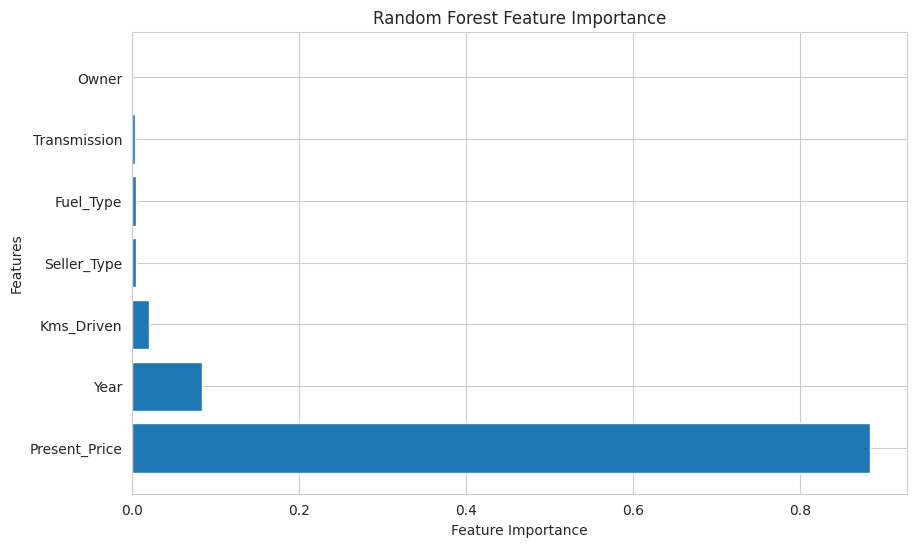

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feacher_importances.index, feacher_importances.values)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
#model selection
print('linear regression', test_r2_lr)
print('lasso regression', test_r2_score_lasso)
print('random forest', test_r2_score_rf)

linear regression 0.8401532365377697
lasso regression 0.8578767759929424
random forest 0.959574921972086


In [ ]:
joblib.dump(rf_reg, 'car_pridiction_model.pkl')

['car_pridiction_model.pkl']

In [ ]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.2 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0
